# Import statements

In [1]:
import stix_quicklook

import os
import matplotlib.pyplot as plt
import astropy.units as u

# Define parameters

In [2]:
folder = '/Users/admin/Documents/GitHub/stix_quicklook_images/'

flaring_data_L1A_fits_filename = folder + '/data/solo_L1A_stix-sci-xray-l1-2105070034_20210507T184238-20210507T190900_031037_V01.fits'
background_L1A_fits_filename   = folder + '/data/solo_L1A_stix-sci-xray-l1-2105080012_20210508T020005-20210508T034005_030902_V01.fits'
flare_start_UTC                = '2021-05-07T18:51:00.000'
flare_end_UTC                  = '2021-05-07T18:53:40.000'
energy_range_science_channel_lower_limit = 6
energy_range_science_channel_upper_limit = 10
spice_kernel_path = '/Users/admin/Documents/GitHub/solar-orbiter/kernels/mk/' # Solar Orbiter SPICE kernel path

outfolder = folder + '/STIX maps/'
if not(os.path.exists(outfolder)):
        os.mkdir(outfolder)
map_filename = outfolder + '/vis_fwdfit_map.fits'

ssw_home = '/Users/admin/ssw'  # Insert path of the SSW folder
idl_home = '/Applications/harris/idl88' # Insert path of IDL installation folder
stx_quicklook_fwdfit_path = folder # path of the folder containing ''

# Run code

In [3]:
stix_quicklook.stix_flare_image_reconstruction(
    background_L1A_fits_filename,
    flaring_data_L1A_fits_filename,
    flare_start_UTC,flare_end_UTC,
    energy_range_science_channel_upper_limit,
    energy_range_science_channel_lower_limit,
    spice_kernel_path,
    map_filename,
    ssw_home,
    idl_home,
    stx_quicklook_fwdfit_path)


SPICE kernels loaded correctly

IDL 8.8.0 (darwin x86_64 m64).
(c) 2020, Harris Geospatial Solutions, Inc.

Licensed for use by: Universita' di Genova
License: 602308
A new version is available: IDL 8.8.1
https://harrisgeospatial.flexnetoperations.com
 
% Compiled module: HISSW_PROCEDURE.
% Compiled module: STIX_LABEL2IND.
% Compiled module: STIX_COMPUTE_SUBCOLLIMATOR_INDICES.
% Compiled module: ANYTIM.
% Compiled module: DATATYPE.
% Compiled module: IS_STRUCT.
% Compiled module: CHECKVAR.
% Compiled module: STR_LASTPOS.
% Compiled module: STR2UTC.
% Compiled module: VALID_NUM.
% Compiled module: DELVARX.
% Compiled module: DELVARX2.
% Compiled module: DESTROY.
% Compiled module: BOOST_ARRAY.
% Compiled module: UTC2INT.
% Compiled module: TAG_EXIST.
% Compiled module: DATE2MJD.
% Compiled module: CHECK_INT_TIME.
% Compiled module: GET_LEAP_SEC.
% Compiled module: UTIME2STR.
% Compiled module: GETUTBASE.
% Compiled module: GETUT.
% Compiled module: INT2EX.
% Compiled module: DAYCNV.
% 

# Plot map


SPICE kernels loaded correctly



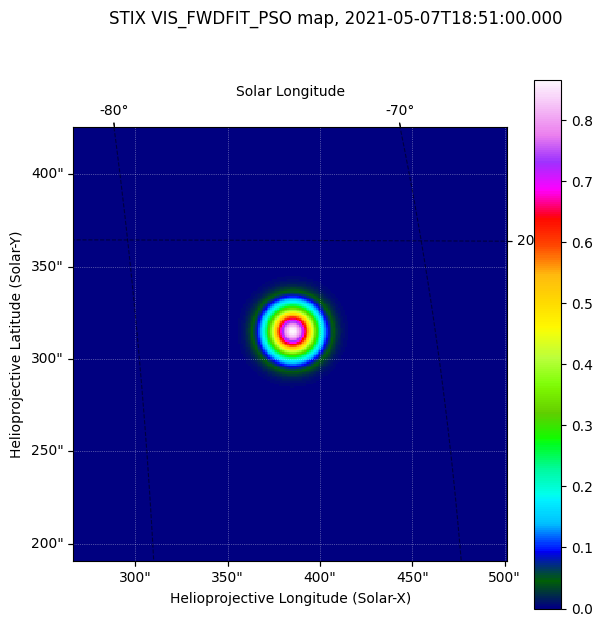

In [4]:
stix_quicklook.load_SOLO_SPICE(spice_kernel_path)

# Center of the STIX image (arcsec)
center_stix_arcsec = [384, 308]

# Convert the input FITS to a Sunpy Solar Map structure
stix_map = stix_quicklook.create_STIX_map(map_filename, flare_start_UTC, center_stix_arcsec)

# Plot the full-disk STIX map
str_title = str(stix_map.meta['instrume'])+', '+stix_map.meta['date-obs']

fig = plt.figure(figsize=(7, 7), dpi=100, facecolor='white')
ax = fig.add_subplot(111, projection=stix_map)
plt.suptitle(str_title)
stix_map.plot(vmin=0., 
               cmap='gist_ncar',#'sdoaia'+str(np.int(aia_map.meta['wavelnth'])), 
               axes=ax, title=False)
stix_map.draw_grid(color='k', ls='--', grid_spacing=10*u.deg)
plt.colorbar()
plt.show()